### Make sure you have following repos checked out on the same filesystem level as this repo

- [deeplocalizer_data](https://github.com/BioroboticsLab/deeplocalizer_data)
- [saliency-localizer](https://github.com/nebw/saliency-localizer)
- [saliency-localizer-models](https://github.com/nebw/saliency-localizer-models)


If your local setup is different you have to change the paths accordingly. 

In [1]:
%matplotlib inline

from os.path import expanduser, join

from localizer.localizer import Localizer
from localizer import visualization

from scipy.misc import imread

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

Using gpu device 0: GeForce GTX 960 (CNMeM is disabled)
/usr/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Using Theano backend.


It is assumed that the `saliency-localizer-models` is checkout on the same level as the `saliency-localizer` repository.
Depending on your setup you might have to change this path.

In [2]:
loc = Localizer()
loc.load_weights('../saliency-localizer-models/season_2015')

2016-02-27 15:38:56,124:INFO - Restoring saliency network weights...


## Compile Localizer

In [3]:
loc.compile()

2016-02-27 15:38:56,177:INFO - Compiling saliency network convolution function...


You have to preprocess the images in the `deeplocalizer_data` with the `preprocess` tool from [`deeplocalizer-tagger`](https://github.com/BioroboticsLab/deeplocalizer_tagger). 
You can either use the wrapper:
```
    ./scripts/generate_all_borders.sh images/season_2015      
```
Or use the preprocess tool:
```
cd /images/season_2015/cam3/
echo "Cam_3_20150911120716_197902_wb.jpeg" > add_border_images.txt
preprocess add_border_images.txt -o `pwd` --use-hist-eq 1 --use-threshold 1
```



In [4]:
image_fname = '../deeplocalizer_data/images/season_2015/cam3/Cam_3_20150911120716_197902_wb.jpeg'

In [5]:
saliencies, candidates, rois = loc.detect_tags(image_fname)

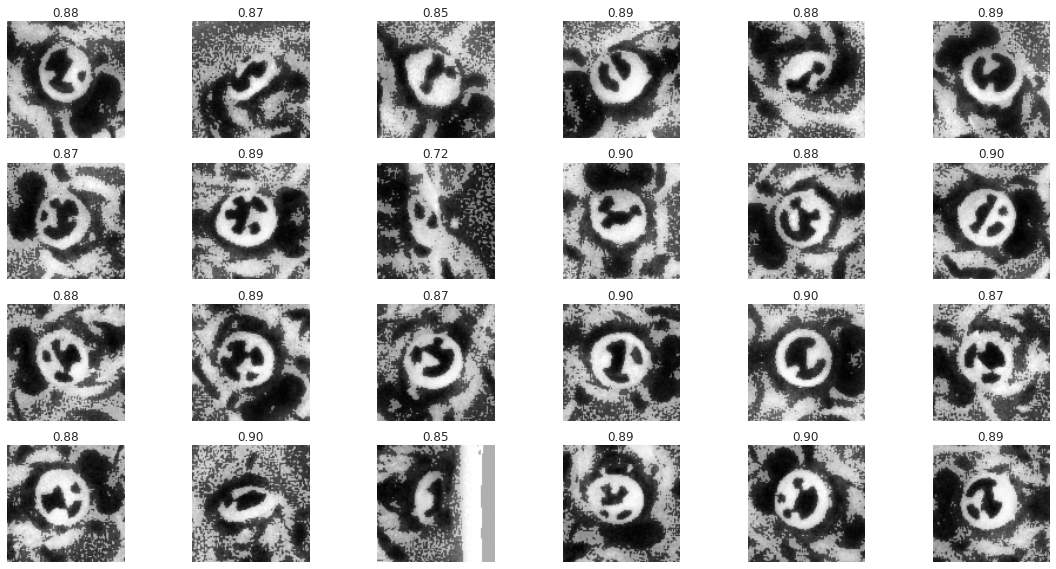

In [6]:
fig = visualization.plot_sample_images(rois, saliencies)

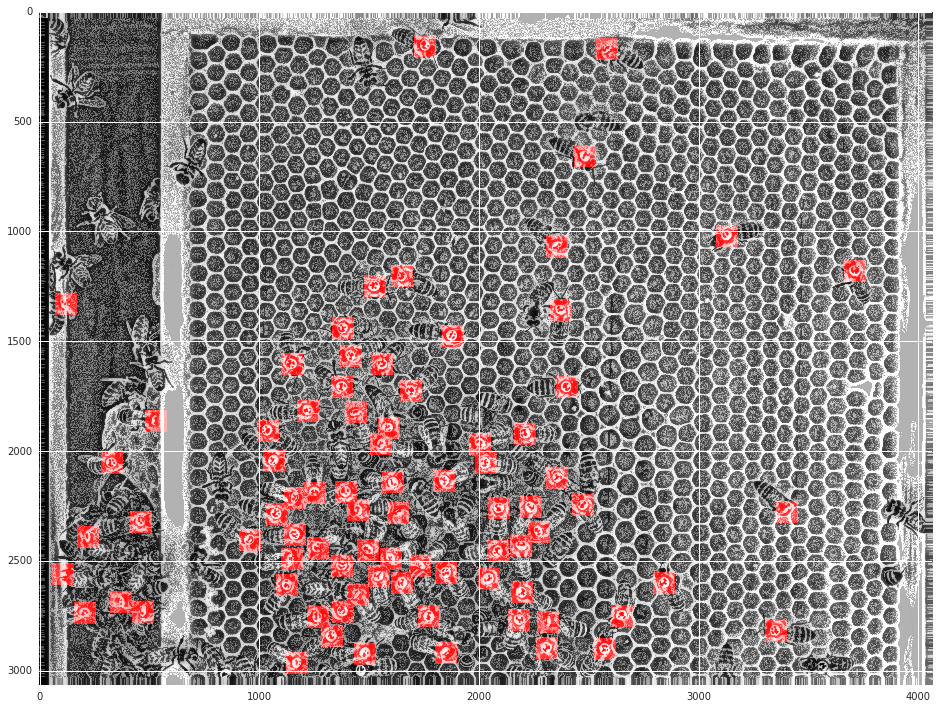

In [7]:
plt.figure(figsize=(16, 16))
_ = plt.imshow(visualization.get_roi_overlay(candidates, imread(image_fname) / 255.))